Import Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from libraries import timeSeq, faultData, scaling, encoding, predicted
from sklearn.decomposition import PCA

In [2]:
import time
start = time.time()

Import Data

In [3]:
%%time
dataTrain = pd.read_csv('data/train/08_M01_DC_train.csv')
dataFault = pd.read_csv('data/train/train_faults/08_M01_train_fault_data.csv')

Wall time: 11 s


Exploratory Analysis

In [4]:
dataTrain.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283162,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.012500,...,-0.152159,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642
1,3283166,08M01,366,2465,10511435,481,3,-0.018959,-0.131884,0.014437,...,-0.164519,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642
2,3283170,08M01,366,2465,10511435,481,3,-0.018959,-0.132437,0.001577,...,-0.164519,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642
3,3283174,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.018836,...,-0.149940,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642
4,3283178,08M01,366,2465,10511435,481,3,-0.018959,-0.131607,0.006156,...,-0.164519,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642


In [5]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716092 entries, 0 to 3716091
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   time                     int64  
 1   Tool                     object 
 2   stage                    int64  
 3   Lot                      int64  
 4   runnum                   int64  
 5   recipe                   int64  
 6   recipe_step              int64  
 7   IONGAUGEPRESSURE         float64
 8   ETCHBEAMVOLTAGE          float64
 9   ETCHBEAMCURRENT          float64
 10  ETCHSUPPRESSORVOLTAGE    float64
 11  ETCHSUPPRESSORCURRENT    float64
 12  FLOWCOOLFLOWRATE         float64
 13  FLOWCOOLPRESSURE         float64
 14  ETCHGASCHANNEL1READBACK  float64
 15  ETCHPBNGASREADBACK       float64
 16  FIXTURETILTANGLE         float64
 17  ROTATIONSPEED            float64
 18  ACTUALROTATIONANGLE      float64
 19  FIXTURESHUTTERPOSITION   float64
 20  ETCHSOURCEUSAGE          float64
 21  ETCHAUXS

In [6]:
dataFault.head()

,time,fault_name,Tool
0,5816876,FlowCool Pressure Dropped Below Limit,08M01
1,6562542,FlowCool Pressure Dropped Below Limit,08M01
2,6760814,FlowCool Pressure Dropped Below Limit,08M01
3,7858308,FlowCool Pressure Dropped Below Limit,08M01
4,9157656,FlowCool Pressure Dropped Below Limit,08M01


In [7]:
dataFault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        117 non-null    int64 
 1   fault_name  117 non-null    object
 2   Tool        117 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [8]:
dataTrain.isnull().sum()

time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0
recipe_step                0
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ROTATIONSPEED              0
ACTUALROTATIONANGLE        0
FIXTURESHUTTERPOSITION     0
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
dtype: int64

In [9]:
dataTrain.describe().loc[["min","max","mean", "std"],:].round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-1.30,-2.08,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,5.54,3.31,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19
mean,20548124.23,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,0.06,-0.01,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03
std,10519227.87,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.04,1.01,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04


Histograma de Datos en Variables Enteras

array([[<AxesSubplot: title={'center': 'stage'}>,
        <AxesSubplot: title={'center': 'Lot'}>],
       [<AxesSubplot: title={'center': 'runnum'}>,
        <AxesSubplot: title={'center': 'recipe'}>],
       [<AxesSubplot: title={'center': 'recipe_step'}>, <AxesSubplot: >]],
      dtype=object)

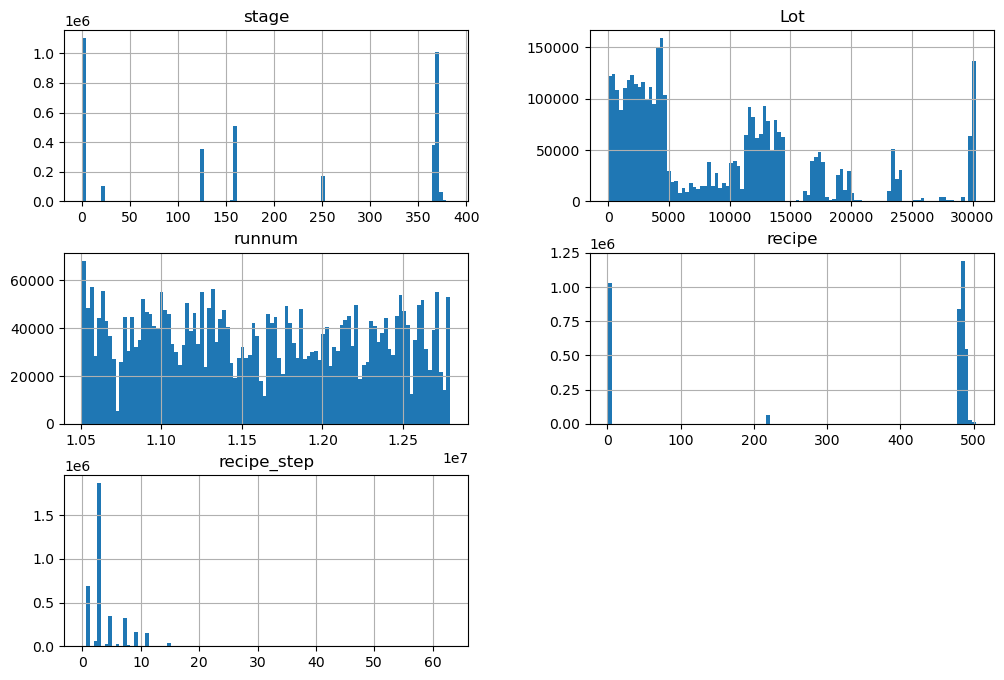

In [10]:
dataTrain[['stage', 'Lot', 'runnum', 'recipe', 'recipe_step']].hist(figsize=(12,8),bins=100)

Distribución de Datos en Variables Float vs Eventos de Falla

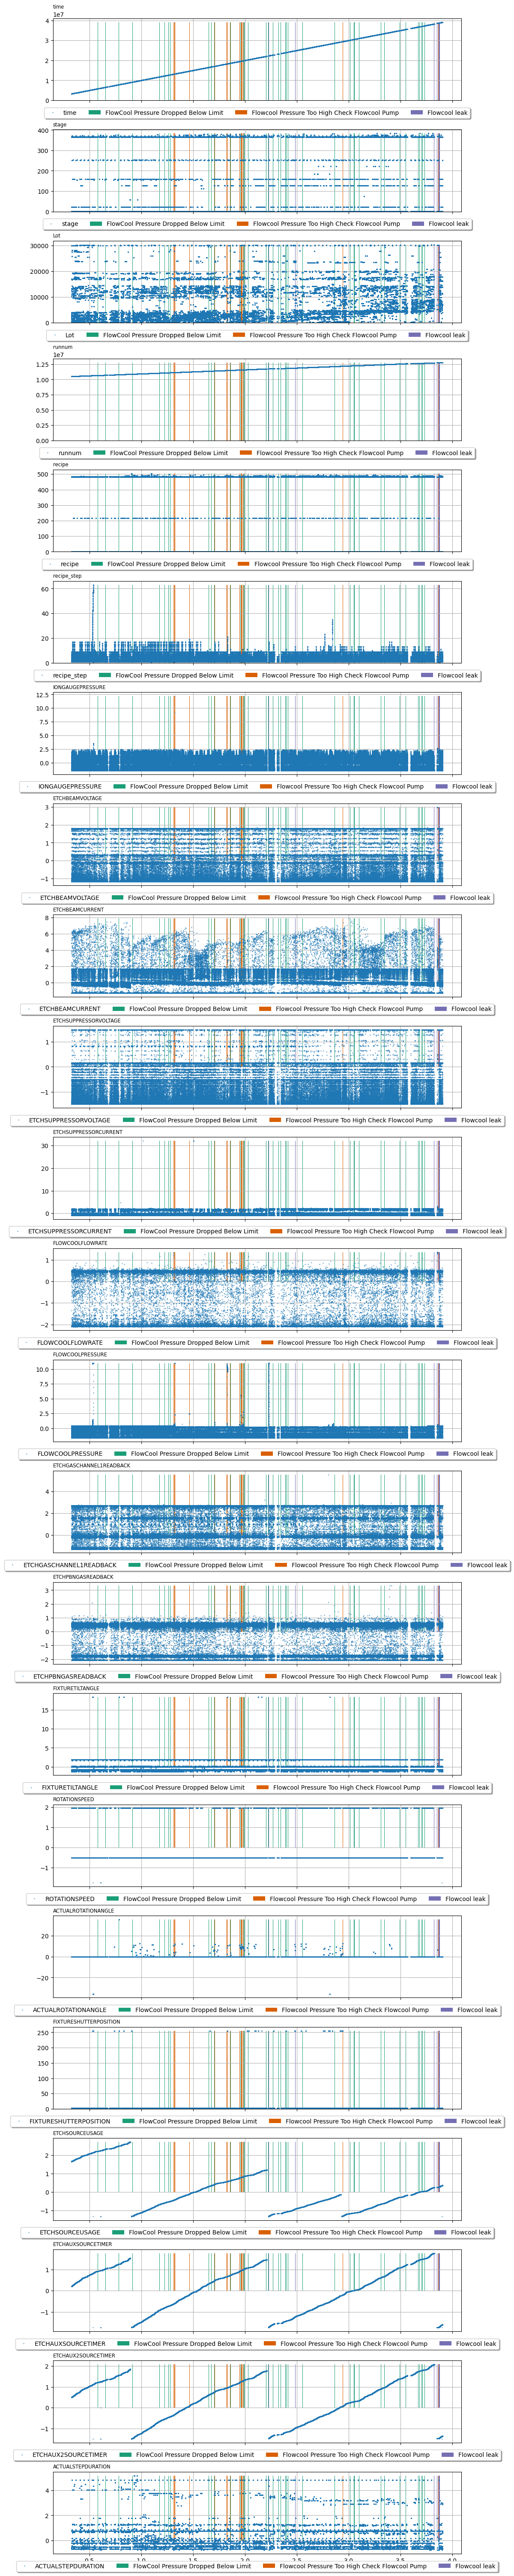

Wall time: 33.8 s


In [11]:
%%time
dataPlot = dataTrain.drop('Tool', axis=1)
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(dataPlot.shape[1], 1, figsize=(12, 60), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

Tabla de Correlación de Variables

data = dataTrain.copy()
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True, square = True, fmt='.2f', annot_kws={'size': 8})
plt.title(data.iloc[1, 1], fontsize=10)
#plt.show()

Pre-proccesing

PRIMER DATASET (DATASET ORIGINAL)

In [12]:
data = dataTrain

In [13]:
%%time
# Completamos el dataset con los eventos de falla (fault-type y fault)
datasetTrain = faultData(data, dataFault)

Wall time: 28.7 s


In [14]:
datasetTrain['fault'].value_counts()

No Fault    3715983
Fault           109
Name: fault, dtype: int64

In [15]:
datasetTrain['fault_type'].value_counts()

No Fault                                          3715983
FlowCool Pressure Dropped Below Limit                  66
Flowcool Pressure Too High Check Flowcool Pump         30
Flowcool leak                                          13
Name: fault_type, dtype: int64

Text(0.5, 1.0, 'Conteo de Tipos de Fallas')

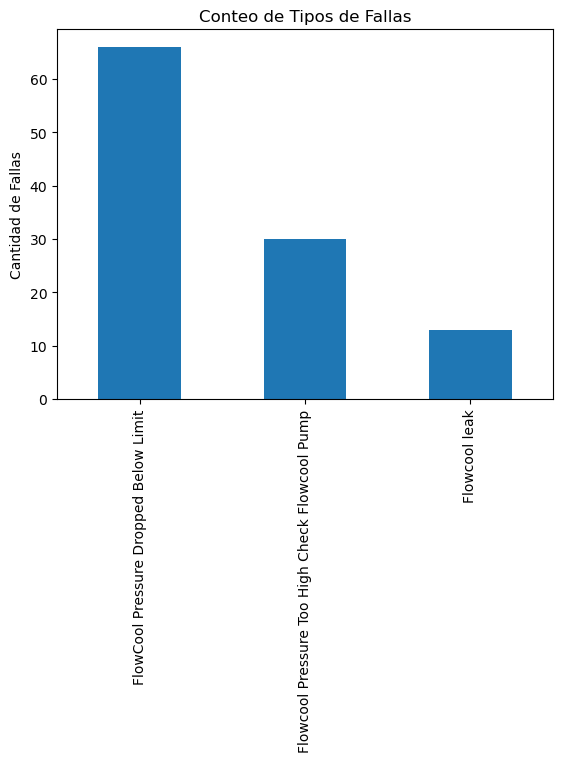

In [16]:
ax = datasetTrain['fault_type'].value_counts().drop('No Fault').plot(kind='bar')
ax.set_ylabel("Cantidad de Fallas")
ax.set_title("Conteo de Tipos de Fallas")

In [17]:
# Encoding
datasetTrain['fault'] = encoding(datasetTrain)

0 ['Fault']
1 ['No Fault']


In [18]:
datasetTrain.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault
count,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,...,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00
mean,20548124.23,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,-0.01,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03,1.00
std,10519227.87,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.01,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04,0.01
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-2.08,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78,0.00
25%,11334545.00,1.00,2494.00,11021465.00,1.00,3.00,-0.65,-1.00,-1.26,-1.24,...,0.46,-0.71,-0.51,-0.09,0.00,-0.78,-0.74,-0.48,-0.57,1.00
50%,19852540.00,159.00,4856.00,11590682.00,482.00,3.00,-0.04,-0.13,0.01,0.16,...,0.56,0.02,-0.51,-0.09,1.00,-0.22,0.26,0.54,-0.50,1.00
75%,29690815.00,368.00,13218.00,12207946.00,483.00,5.00,0.69,0.31,0.02,0.16,...,0.57,0.11,1.95,-0.09,1.00,0.69,0.92,1.21,0.70,1.00
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,3.31,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19,1.00


In [19]:
datasetTrain.corr()[['fault']].sort_values(by = 'fault', ascending = False)

,fault
fault,1.000000
FLOWCOOLFLOWRATE,0.007436
ETCHPBNGASREADBACK,0.006221
FLOWCOOLPRESSURE,0.005697
ETCHSUPPRESSORVOLTAGE,0.004983
ETCHBEAMCURRENT,0.004162
IONGAUGEPRESSURE,0.004040
ETCHBEAMVOLTAGE,0.003812
ETCHGASCHANNEL1READBACK,0.003667
recipe,0.003479


SEGUNDO DATASET (DATASET ORIGINAL + SECUENCIA DE TIEMPO)

Proceso de completar la serie de tiempo faltante

In [20]:
data = dataTrain

In [21]:
%%time
dataSeq = timeSeq(data, 20000)

Wall time: 6min 13s


In [22]:
dataSeq.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,filled
count,5500842.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,...,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,5500842.00
mean,21179785.07,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,-0.01,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03,0.32
std,10506321.65,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.01,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04,0.47
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-2.08,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78,0.00
25%,11834523.00,1.00,2494.00,11021465.00,1.00,3.00,-0.65,-1.00,-1.26,-1.24,...,0.46,-0.71,-0.51,-0.09,0.00,-0.78,-0.74,-0.48,-0.57,0.00
50%,21039298.00,159.00,4856.00,11590682.00,482.00,3.00,-0.04,-0.13,0.01,0.16,...,0.56,0.02,-0.51,-0.09,1.00,-0.22,0.26,0.54,-0.50,0.00
75%,30342255.00,368.00,13218.00,12207946.00,483.00,5.00,0.69,0.31,0.02,0.16,...,0.57,0.11,1.95,-0.09,1.00,0.69,0.92,1.21,0.70,1.00
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,3.31,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19,1.00


In [23]:
dataSeq.drop('filled', axis=1, inplace=True)

In [24]:
# Se detalla la cantidad de datos a completar 
dataSeq.isnull().sum()

time                             0
Tool                       1784750
stage                      1784750
Lot                        1784750
runnum                     1784750
recipe                     1784750
recipe_step                1784750
IONGAUGEPRESSURE           1784750
ETCHBEAMVOLTAGE            1784750
ETCHBEAMCURRENT            1784750
ETCHSUPPRESSORVOLTAGE      1784750
ETCHSUPPRESSORCURRENT      1784750
FLOWCOOLFLOWRATE           1784750
FLOWCOOLPRESSURE           1784750
ETCHGASCHANNEL1READBACK    1784750
ETCHPBNGASREADBACK         1784750
FIXTURETILTANGLE           1784750
ROTATIONSPEED              1784750
ACTUALROTATIONANGLE        1784750
FIXTURESHUTTERPOSITION     1784750
ETCHSOURCEUSAGE            1784750
ETCHAUXSOURCETIMER         1784750
ETCHAUX2SOURCETIMER        1784750
ACTUALSTEPDURATION         1784750
dtype: int64

In [25]:
%%time
# Completamos la secuencia de datos faltante
dataFilled = dataSeq.fillna(method = 'ffill')

Wall time: 971 ms


In [26]:
dataFilled.shape

(5500842, 24)

%%time
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(dataFilled.corr(),cmap=plt.cm.Reds,annot=True, square = True, fmt='.2f', annot_kws={'size': 8})
plt.title(dataTrain.iloc[1, 1], fontsize=10)
plt.show()

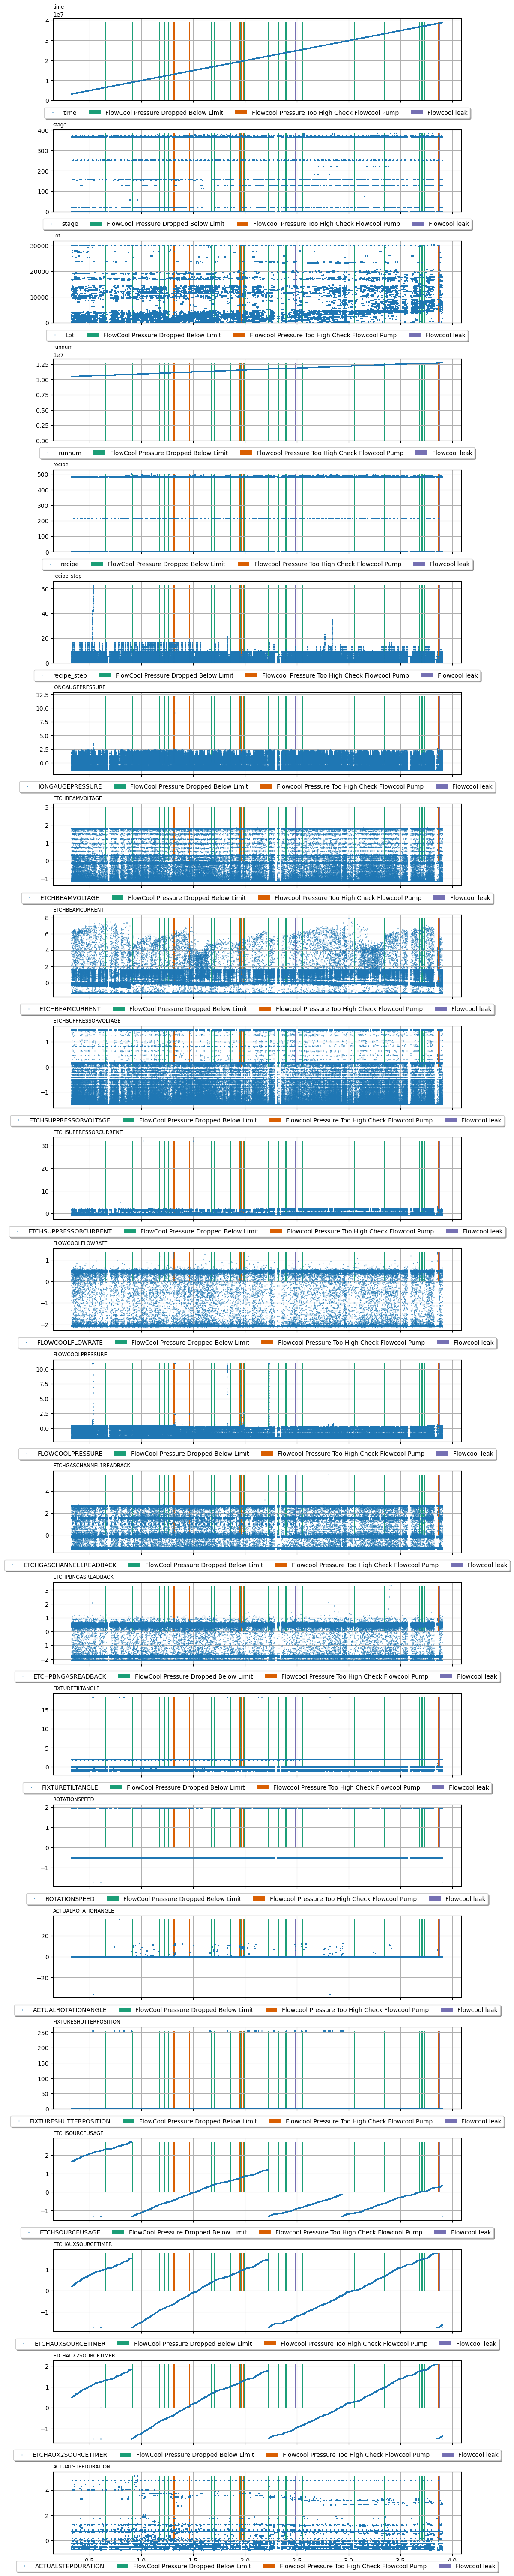

Wall time: 51.5 s


In [27]:
%%time
dataPlot = dataFilled.drop('Tool', axis=1)
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(dataPlot.shape[1], 1, figsize=(12, 60), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

In [28]:
%%time
# Incluir datos de falla
datasetFilled = faultData(dataFilled, dataFault)

Wall time: 34.9 s


In [29]:
# Encoding
datasetFilled['fault'] = encoding(datasetFilled)

0 ['Fault']
1 ['No Fault']


In [30]:
datasetFilled.corr()[['fault']].sort_values(by = 'fault', ascending = False)

,fault
fault,1.000000
FLOWCOOLFLOWRATE,0.002778
ETCHPBNGASREADBACK,0.002464
FLOWCOOLPRESSURE,0.002232
ETCHSUPPRESSORVOLTAGE,0.001980
stage,0.001881
ETCHBEAMCURRENT,0.001702
IONGAUGEPRESSURE,0.001595
recipe,0.001587
ETCHBEAMVOLTAGE,0.001558


Feature Selection

In [31]:
features = ['recipe_step', 'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'FIXTURETILTANGLE', 'ROTATIONSPEED', 
            'ACTUALROTATIONANGLE','FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ACTUALSTEPDURATION']

TERCER DATASET (DATASET ORIGINAL + PCA)

In [32]:
data = dataTrain

In [33]:
%%time
X = data[features]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Wall time: 8.82 s


In [34]:
pca.explained_variance_ratio_

array([0.93908726, 0.03934022])

In [35]:
datasetPca = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [36]:
datasetPca.head()

,PC1,PC2
0,-1.330867,-1.069301
1,-1.330811,-1.069514
2,-1.330803,-1.069467
3,-1.330848,-1.068979
4,-1.330783,-1.069230


In [37]:
datasetPca[['time', 'fault']] = datasetTrain[['time', 'fault']]
datasetPca = datasetPca[['time', 'PC1', 'PC2', 'fault']]

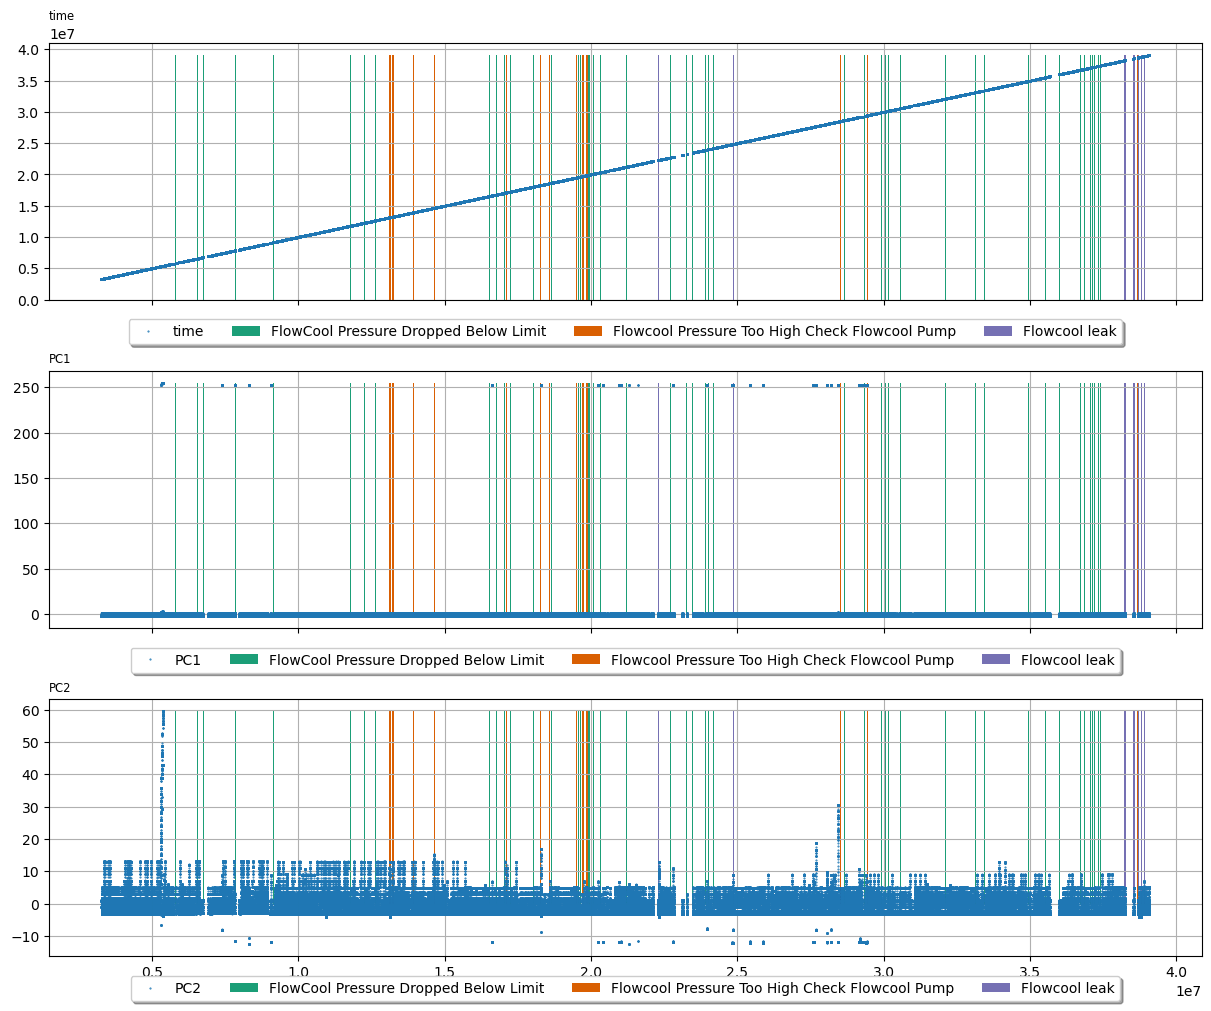

Wall time: 4.29 s


In [38]:
%%time
dataPlot = datasetPca.drop('fault', axis = 1)
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(dataPlot.shape[1], 1, figsize=(12, 10), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
plt.show()

Wall time: 2.81 s


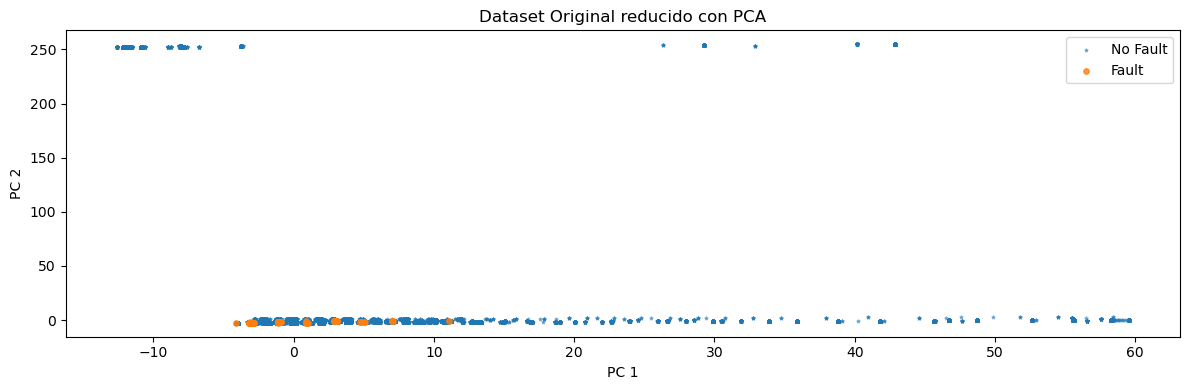

In [39]:
%%time
# Generamos el scatter plot con los PC
markers = ['x','o']
plt.figure(figsize=(12,4))
scatter = plt.scatter(datasetPca['PC2'][datasetPca['fault'] == 1], datasetPca['PC1'][datasetPca['fault'] == 1], 
                      marker = '*', s = 5, alpha = 0.5, label = 'No Fault')
scatter = plt.scatter(datasetPca['PC2'][datasetPca['fault'] == 0], datasetPca['PC1'][datasetPca['fault'] == 0], 
                      marker = 'o', s = 15, alpha = 0.8, label = 'Fault')
plt.legend()
plt.title('Dataset Original reducido con PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

MODELOS BASE

In [40]:
datasetTrain.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,fault
0,3283162,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.012500,...,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642,No Fault,1
1,3283166,08M01,366,2465,10511435,481,3,-0.018959,-0.131884,0.014437,...,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642,No Fault,1
2,3283170,08M01,366,2465,10511435,481,3,-0.018959,-0.132437,0.001577,...,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642,No Fault,1
3,3283174,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.018836,...,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642,No Fault,1
4,3283178,08M01,366,2465,10511435,481,3,-0.018959,-0.131607,0.006156,...,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642,No Fault,1


In [41]:
datasetPca.head()

,time,PC1,PC2,fault
0,3283162,-1.330867,-1.069301,1
1,3283166,-1.330811,-1.069514,1
2,3283170,-1.330803,-1.069467,1
3,3283174,-1.330848,-1.068979,1
4,3283178,-1.330783,-1.069230,1


In [42]:
datasetFilled.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,fault
0,3283162,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132713,0.012500,...,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642,No Fault,1
1,3283166,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.131884,0.014437,...,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642,No Fault,1
2,3283170,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132437,0.001577,...,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642,No Fault,1
3,3283174,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132713,0.018836,...,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642,No Fault,1
4,3283178,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.131607,0.006156,...,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642,No Fault,1


In [43]:
datasetTrain.shape

(3716092, 26)

In [44]:
datasetPca.shape

(3716092, 4)

In [45]:
datasetFilled.shape

(5500842, 26)

In [47]:
end = time.time()
print("El tiempo transcurrido es: %.2f [minutos]" % ((end-start)/60))

El tiempo transcurrido es: 13.11 [minutos]
